In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading the data

data = pd.read_csv('../../data/raw/marketing_campaign.csv', sep="\t")

data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.shape # checking how many rows and columns the dataset have

(2240, 29)

In [8]:
# Checking column names and datatypes

print(data.info())

# Looking at the results we can see that Income column has missing values which 
   # we'll have to look into feature engennering part

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   str    
 3   Marital_Status       2240 non-null   str    
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   str    
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64  
 16 

In [10]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [14]:
# converting dt_customer (Date of customer's enrollment with the company) column to 
# datetime (which is currently str)

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y') 

data['Dt_Customer'].dtype



dtype('<M8[us]')

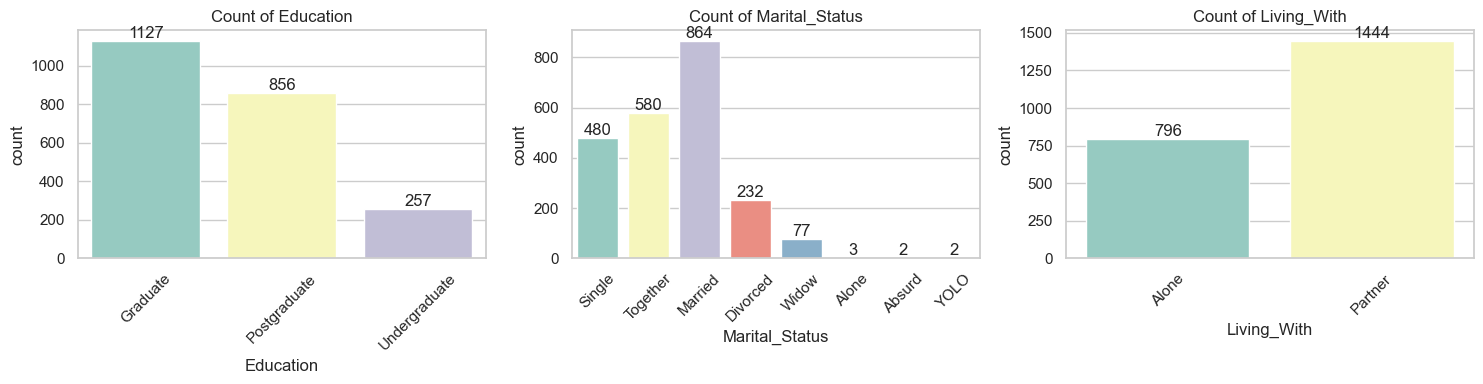

In [102]:
# Checking distribution of categorical variables

str_columns = data.select_dtypes(include='str').columns
fig, axes = plt.subplots(1, len(str_columns), figsize=(5*len(str_columns), 4))

if len(str_columns) == 1:
    axes = [axes]

for ax, col in zip(axes, str_columns):
    sns.countplot(x=col, data=data,hue=col, ax=ax, palette="Set3")
    
    # Add counts
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=12)
    
    ax.set_title(f"Count of {col}")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [48]:
# Add some additional features that might be useful and might give insights

# calculating Age of the customer
data['Age'] = 2026 - data['Year_Birth']

# calculating total spend by the customer over all the categories
data['Total_Spend'] = (data['MntWines'] + data['MntFruits'] 
                            + data['MntMeatProducts'] + data['MntFishProducts'] 
                            + data['MntSweetProducts'] + data['MntGoldProds'] )

# Calculating Total number of children 
data['Children_at_home'] = data['Kidhome'] + data['Teenhome']

# we can see in above bar charts that Marital_status has few categories which has small numbers 
# so consolidating them 
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

# Total family members inclusing children
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2}) + data["Children_at_home"]

data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spend,Children_at_home,Living_With,Family_Size
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,69,1617,0,Alone,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,72,27,2,Alone,3
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,61,776,0,Partner,2
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,42,53,1,Partner,3
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,45,422,1,Partner,3


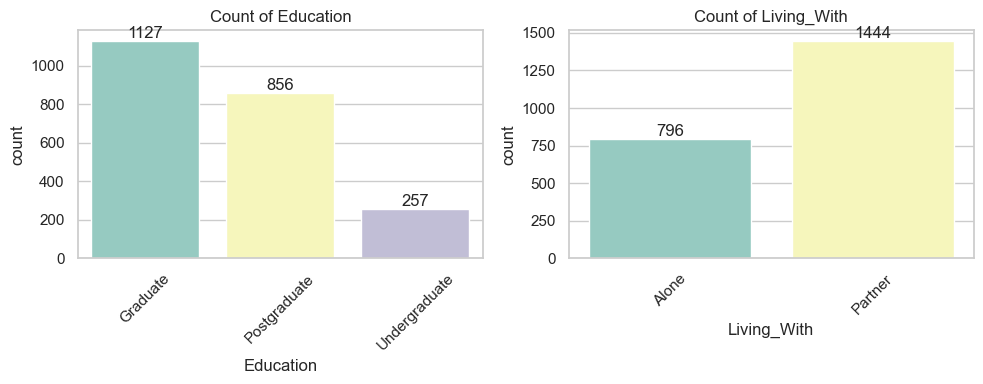

In [101]:
# Updated categorical variables 
str_columns = ['Education','Living_With']
fig, axes = plt.subplots(1, len(str_columns), figsize=(5*len(str_columns), 4))

if len(str_columns) == 1:
    axes = [axes]

for ax, col in zip(axes, str_columns):
    sns.countplot(x=col, data=data,hue=col, ax=ax, palette="Set3")
    
    # Add counts
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=12)
    
    ax.set_title(f"Count of {col}")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [86]:
# checking descriptive statistics for some useful numerical variables
# Looking at Age - there is a max value of 133 which is outlier

# Columns to analyze
num_cols = (["Income", "Age", "Total_Spend","Children_at_home","Recency",
         "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
          "NumStorePurchases", "NumWebVisitsMonth","MntWines","MntFruits","MntMeatProducts",
          "MntFishProducts","MntSweetProducts","MntGoldProds",
            "AcceptedCmp3" , "AcceptedCmp4", "AcceptedCmp5" ,"AcceptedCmp1", "AcceptedCmp2",
          "Complain", "Response"])

# Compute descriptive stats
numeric_analysis = data[num_cols].describe().T

# Add skewness and kurtosis
numeric_analysis['skewness'] = data[num_cols].skew()
numeric_analysis['kurtosis'] = data[num_cols].kurtosis()

# Round all numbers to 2 decimal points
numeric_analysis = numeric_analysis.round(2)

print(numeric_analysis)

                      count      mean       std     min       25%      50%  \
Income               2216.0  52247.25  25173.08  1730.0  35303.00  51381.5   
Age                  2240.0     57.19     11.98    30.0     49.00     56.0   
Total_Spend          2240.0    605.80    602.25     5.0     68.75    396.0   
Children_at_home     2240.0      0.95      0.75     0.0      0.00      1.0   
Recency              2240.0     49.11     28.96     0.0     24.00     49.0   
NumDealsPurchases    2240.0      2.33      1.93     0.0      1.00      2.0   
NumWebPurchases      2240.0      4.08      2.78     0.0      2.00      4.0   
NumCatalogPurchases  2240.0      2.66      2.92     0.0      0.00      2.0   
NumStorePurchases    2240.0      5.79      3.25     0.0      3.00      5.0   
NumWebVisitsMonth    2240.0      5.32      2.43     0.0      3.00      6.0   
MntWines             2240.0    303.94    336.60     0.0     23.75    173.5   
MntFruits            2240.0     26.30     39.77     0.0      1.0

/var/folders/08/9gzj383d0bs4vmtspd0mdmj80000gn/T/ipykernel_1661/648895361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set3")
/var/folders/08/9gzj383d0bs4vmtspd0mdmj80000gn/T/ipykernel_1661/648895361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set3")
/var/folders/08/9gzj383d0bs4vmtspd0mdmj80000gn/T/ipykernel_1661/648895361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set3")
/var/folders/08/9gzj383d0bs4vmtspd0mdmj8000

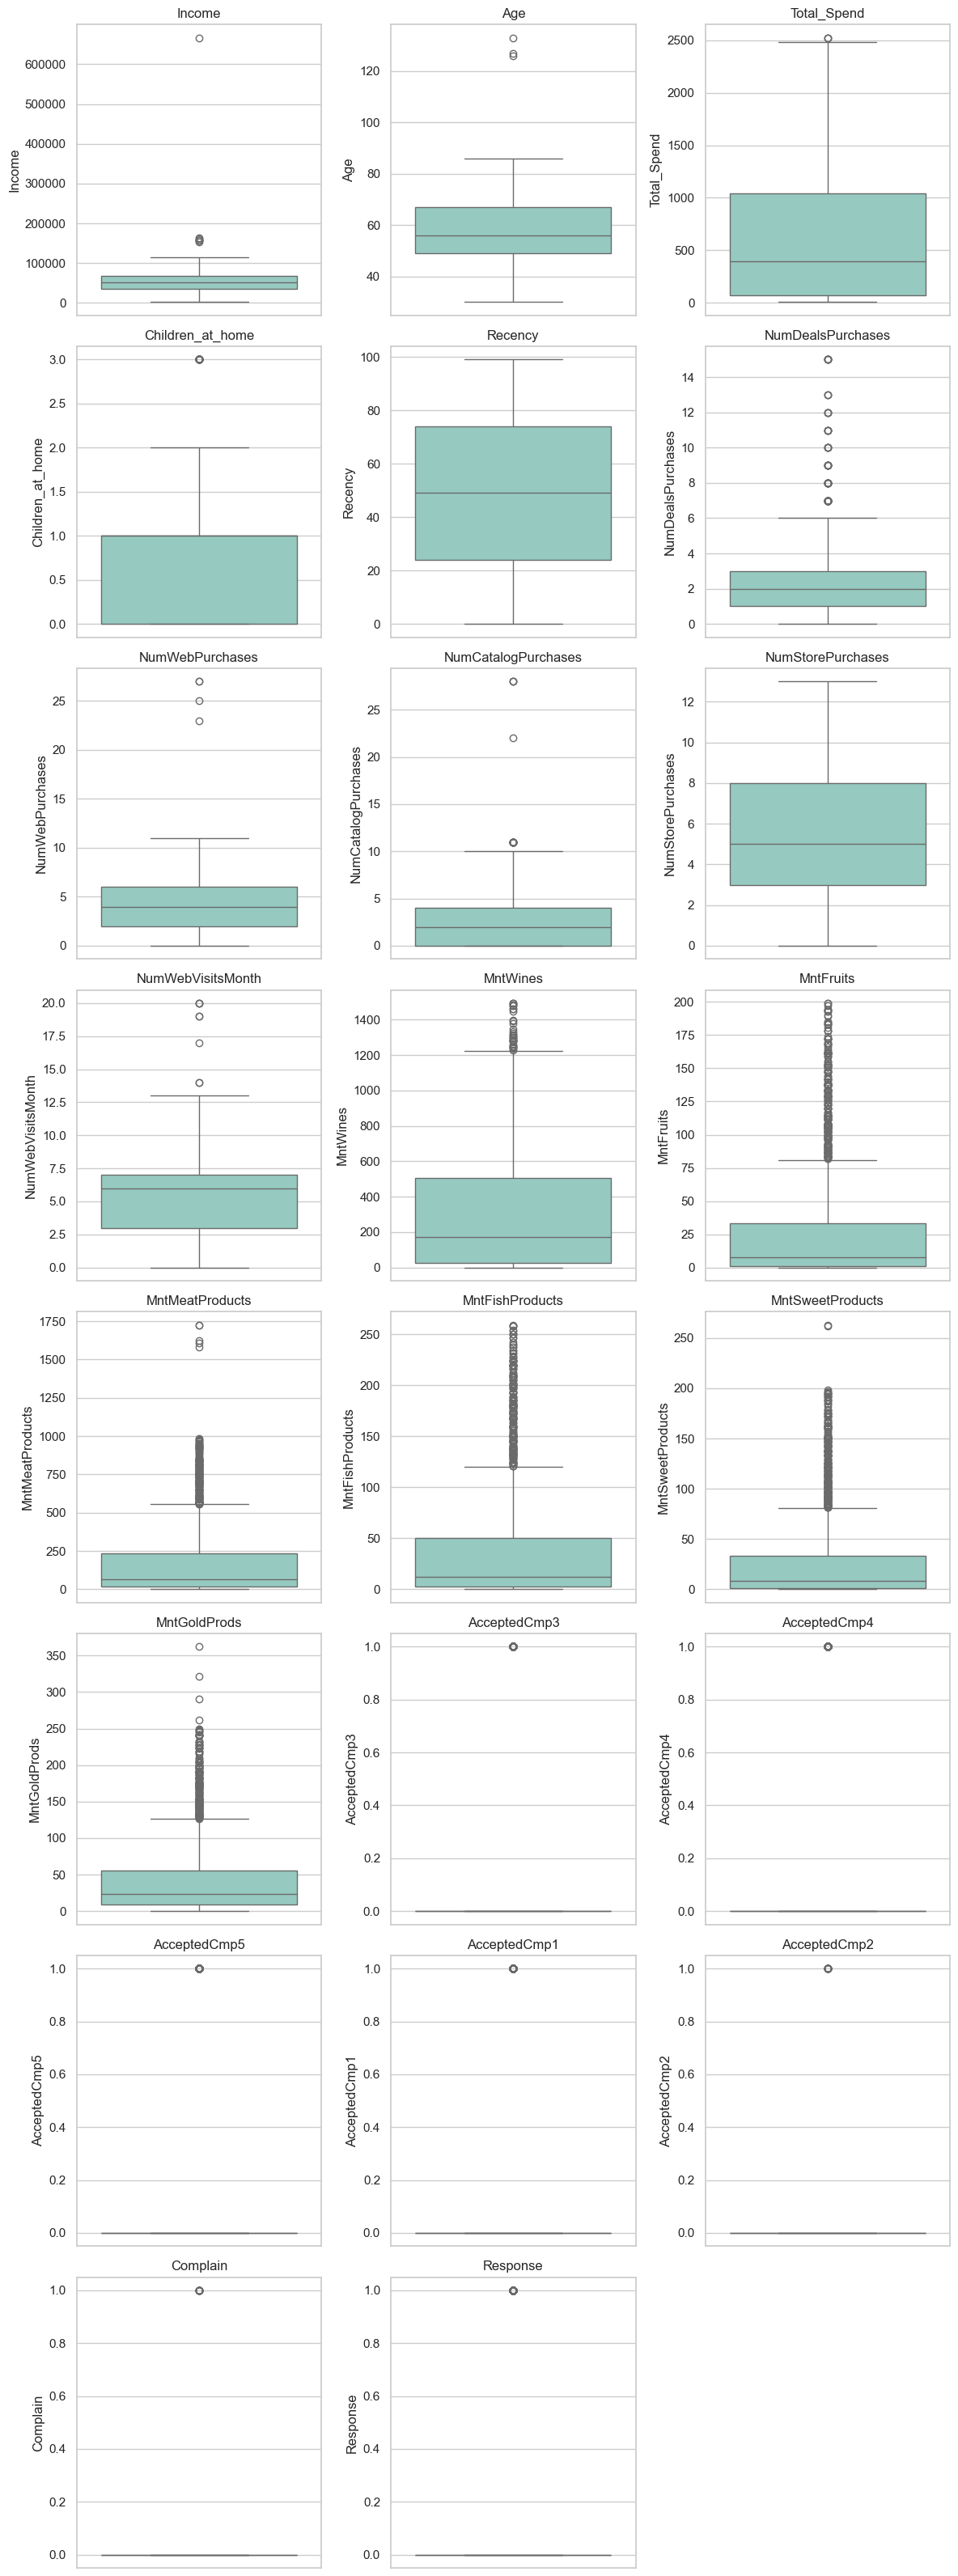

In [96]:
# Checking for outliers - based on the results we have few outliers that we need to fix

# Determine grid layout
cols_per_row = 3  # number of subplots per row
n_rows = int(np.ceil(len(num_cols) / cols_per_row))

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(cols_per_row*4, n_rows*4))
axes = axes.flatten()  # flatten for easy looping

# Loop through columns
for i, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[i], palette="Set3")
    axes[i].set_title(col)

# Remove any extra empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

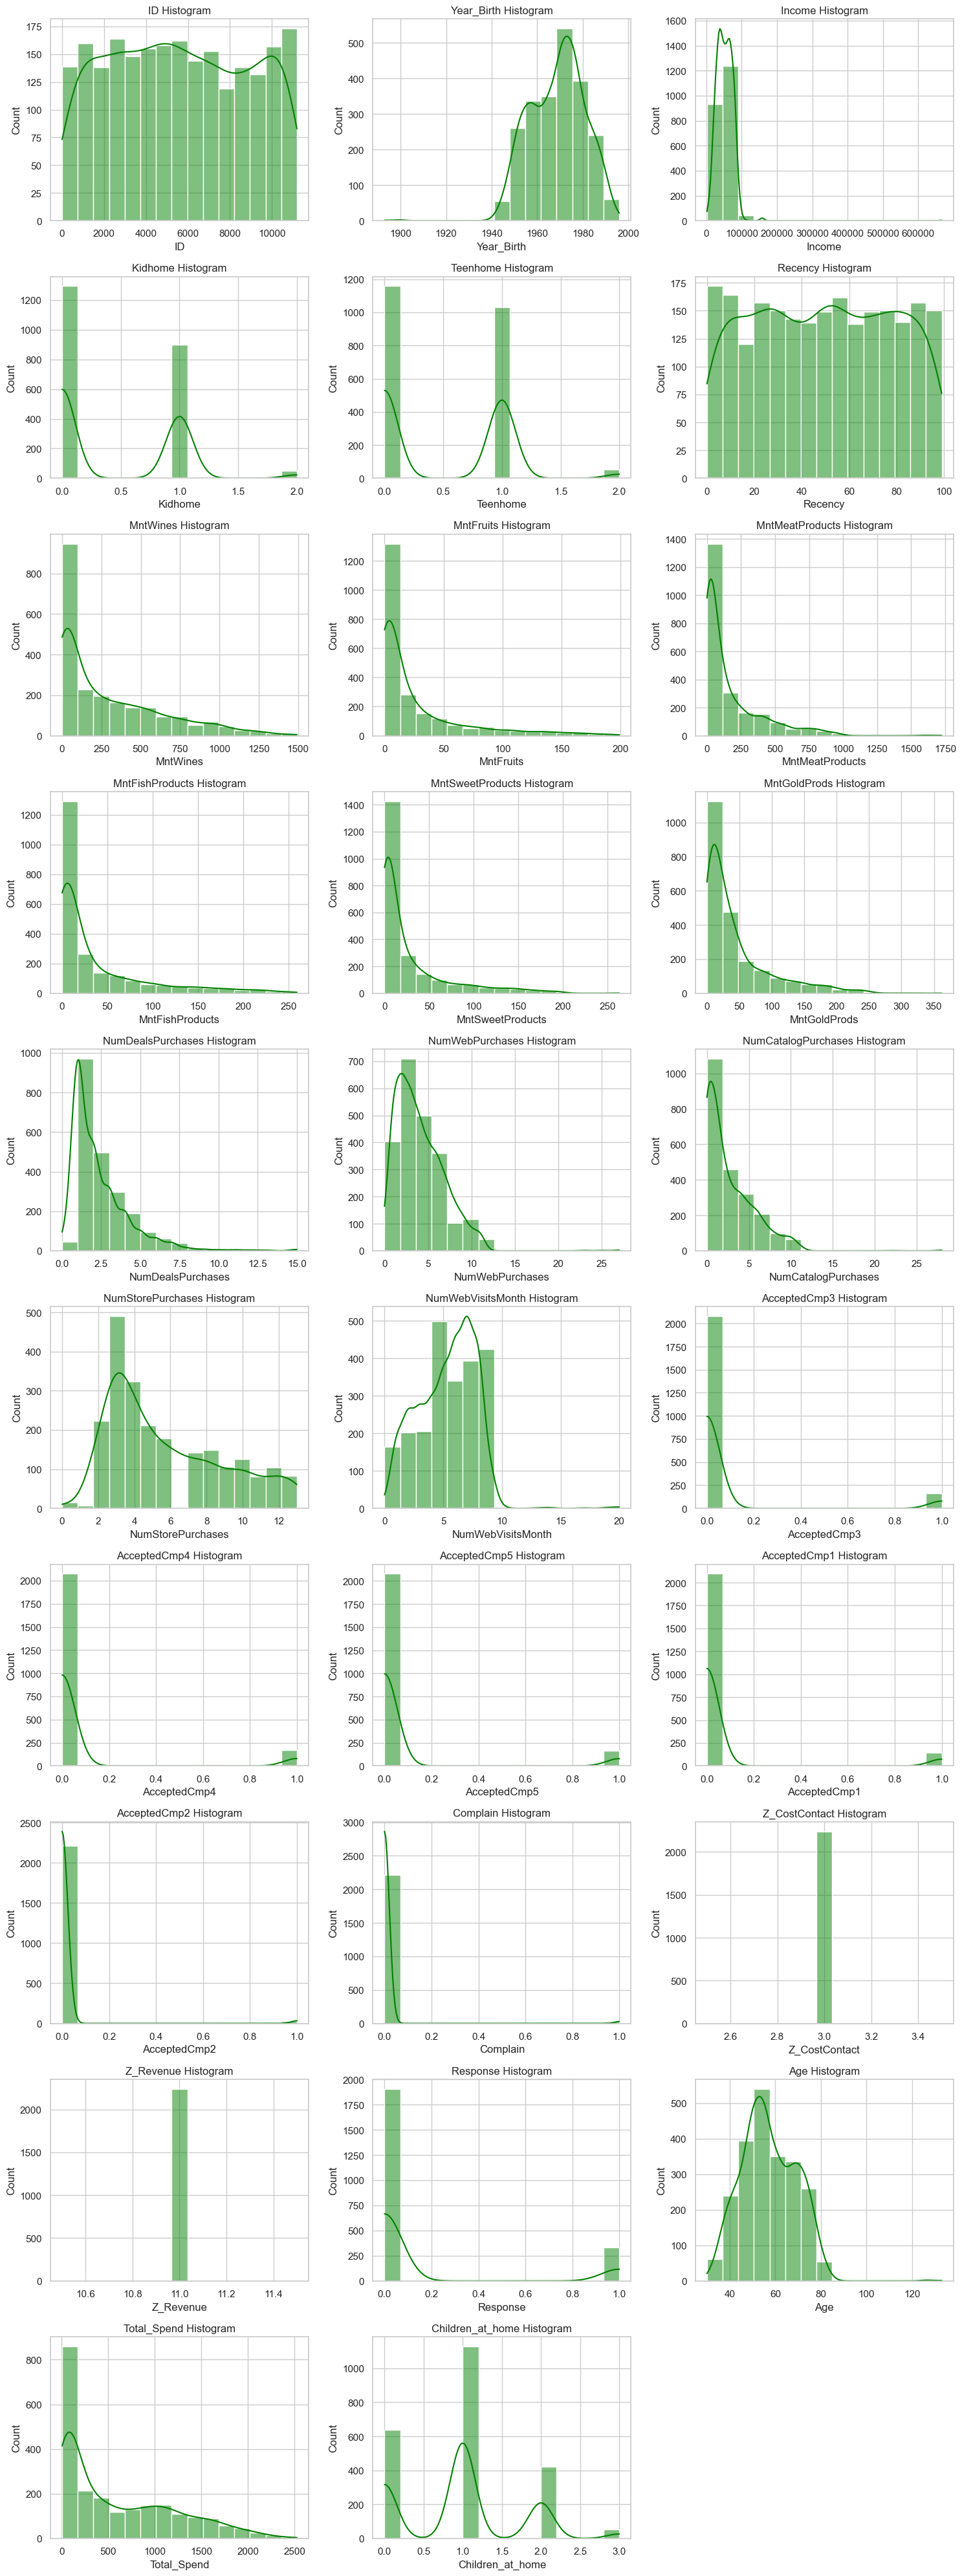

In [104]:
# Plot histograms for all numeric columns to check for distribution 

numeric_cols = data.select_dtypes(include=np.number).columns

# Determine layout
n_cols_per_row = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols_per_row))

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(n_cols_per_row*5, n_rows*4))
axes = axes.flatten()  # flatten for easy looping

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], bins=15, kde=True, ax=axes[i], color="green")
    axes[i].set_title(f"{col} Histogram")

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

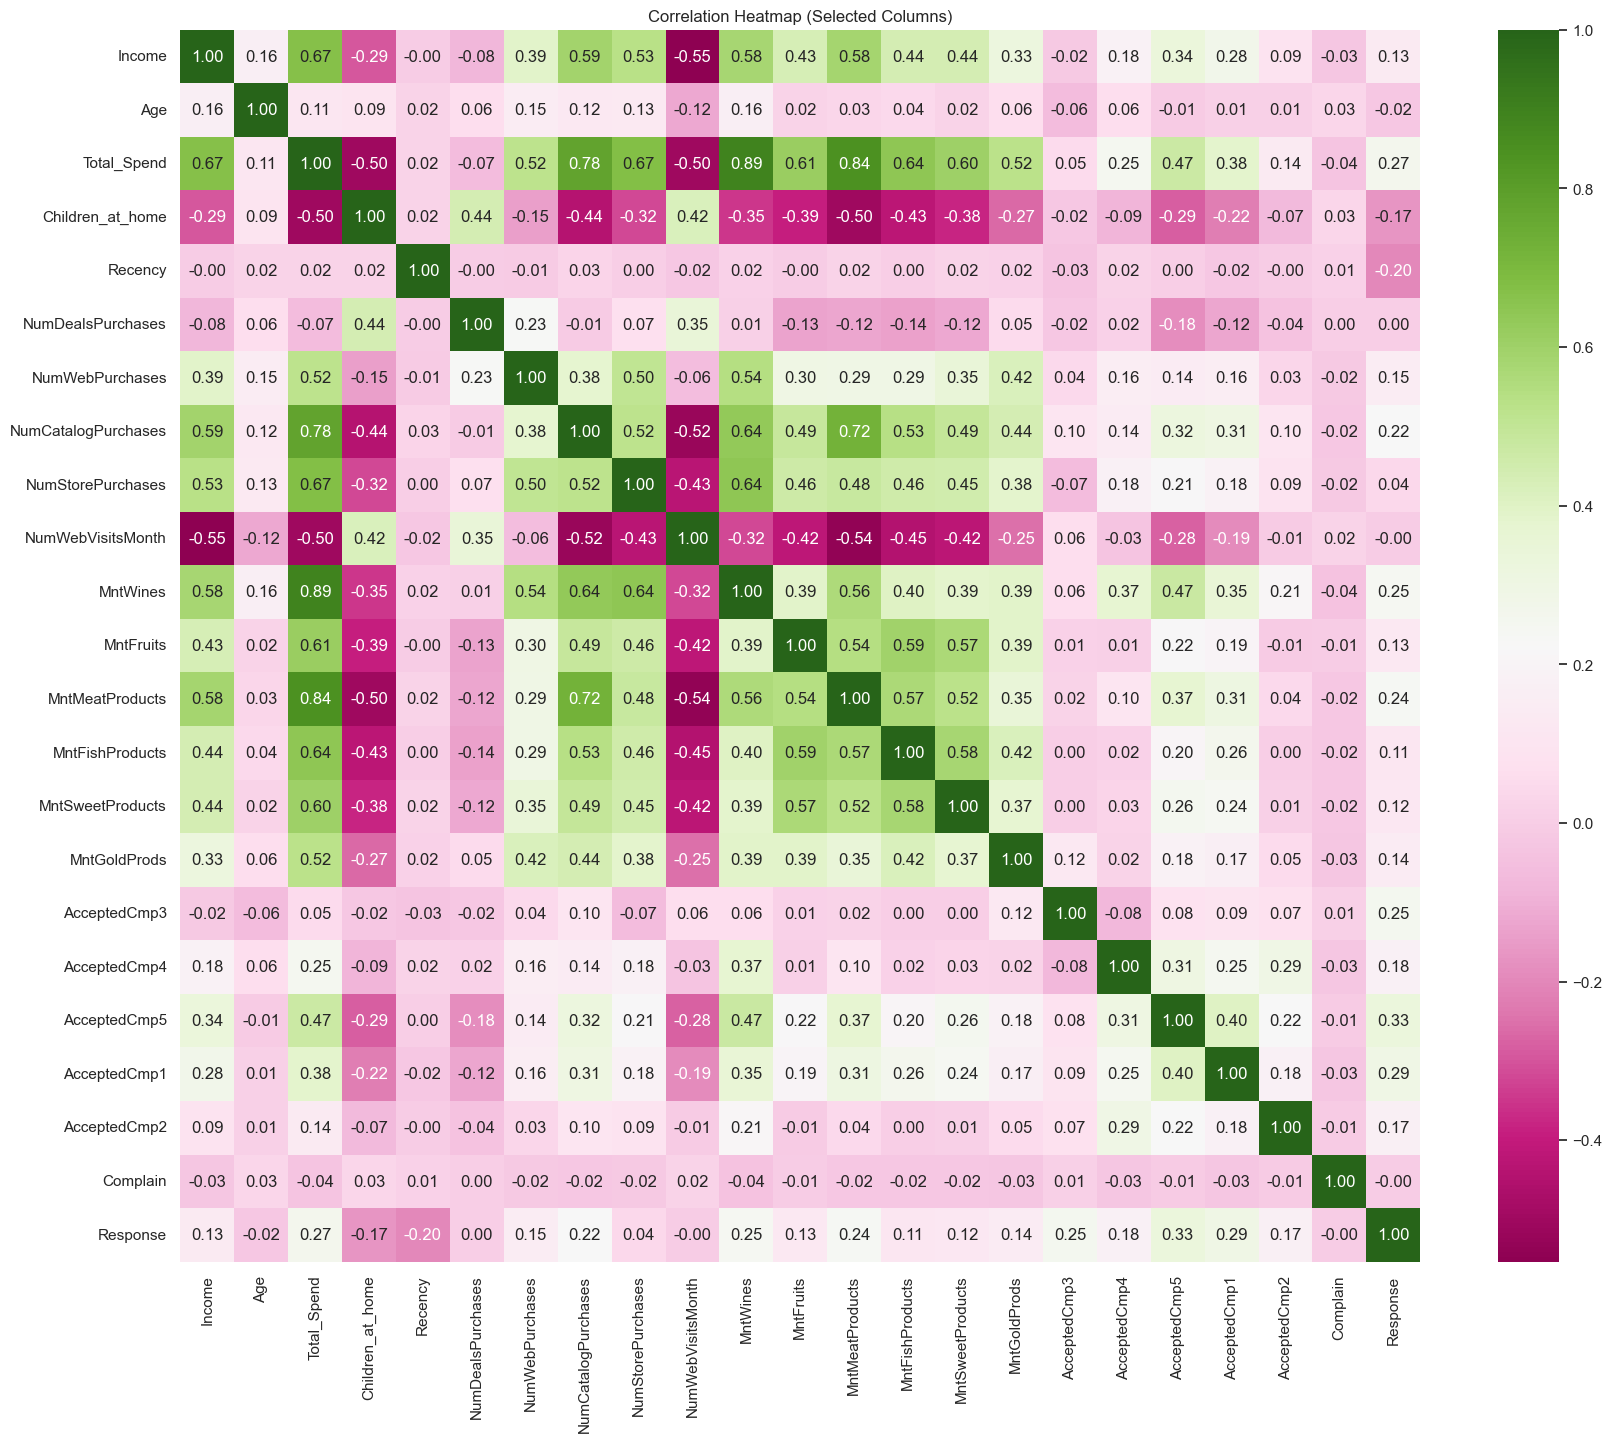

In [112]:

# Columns to include in correlation
cols_corr = (["Income", "Age", "Total_Spend","Children_at_home","Recency",
         "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
          "NumStorePurchases", "NumWebVisitsMonth","MntWines","MntFruits","MntMeatProducts",
          "MntFishProducts","MntSweetProducts","MntGoldProds",
            "AcceptedCmp3" , "AcceptedCmp4", "AcceptedCmp5" ,"AcceptedCmp1", "AcceptedCmp2",
          "Complain", "Response"])

# Compute correlation for selected columns
corr = data[cols_corr].corr()

# Plot heatmap
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PiYG")
plt.title("Correlation Heatmap (Selected Columns)")
plt.show()

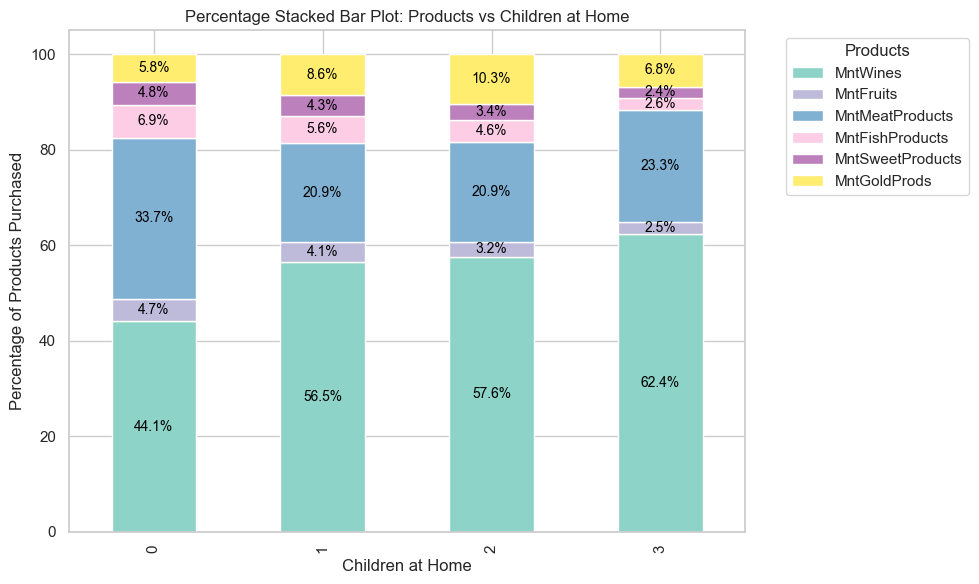

In [100]:
# Checking products Vs Number of childern at home

# Columns representing products
products = ["MntWines","MntFruits","MntMeatProducts",
          "MntFishProducts","MntSweetProducts","MntGoldProds"]

# Aggregate: sum of each product by number of children
agg = data.groupby("Children_at_home")[products].sum()

# Convert to percentages row-wise
agg_pct = agg.div(agg.sum(axis=1), axis=0) * 100

# Plot stacked bars
ax = agg_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')

# Add percentage labels on each segment
for i, child in enumerate(agg_pct.index):
    bottom = 0
    for prod in products:
        value = agg_pct.loc[child, prod]
        if value > 0:  # display only if > 0%
            ax.text(i, bottom + value/2, f"{value:.1f}%", ha='center', va='center', fontsize=10, color='black')
        bottom += value

plt.title("Percentage Stacked Bar Plot: Products vs Children at Home")
plt.xlabel("Children at Home")
plt.ylabel("Percentage of Products Purchased")
plt.legend(title="Products", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


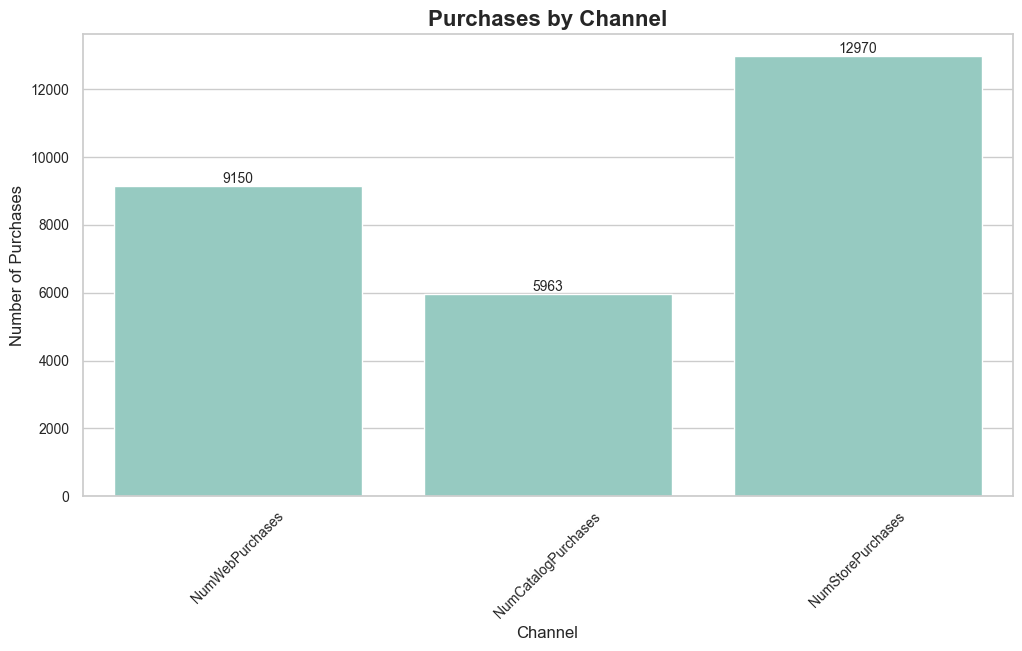

In [111]:
# checking purchase channels


purchase_columns = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
palette = sns.color_palette("Set3")

# Aggregate total purchases per channel
total_purchases = data[purchase_columns].sum().reset_index()
total_purchases.columns = ["Channel", "TotalPurchases"]

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Channel", 
    y="TotalPurchases", 
    data=total_purchases
)

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # center of the bar
        y=height + 0.5,                  # slightly above the bar
        s=int(height),                    # convert to integer
        ha='center', 
        va='bottom',
        fontsize=10
    )

plt.title('Purchases by Channel', fontsize=16, fontweight='bold')
plt.ylabel('Number of Purchases', fontsize=12)
plt.xlabel('Channel', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


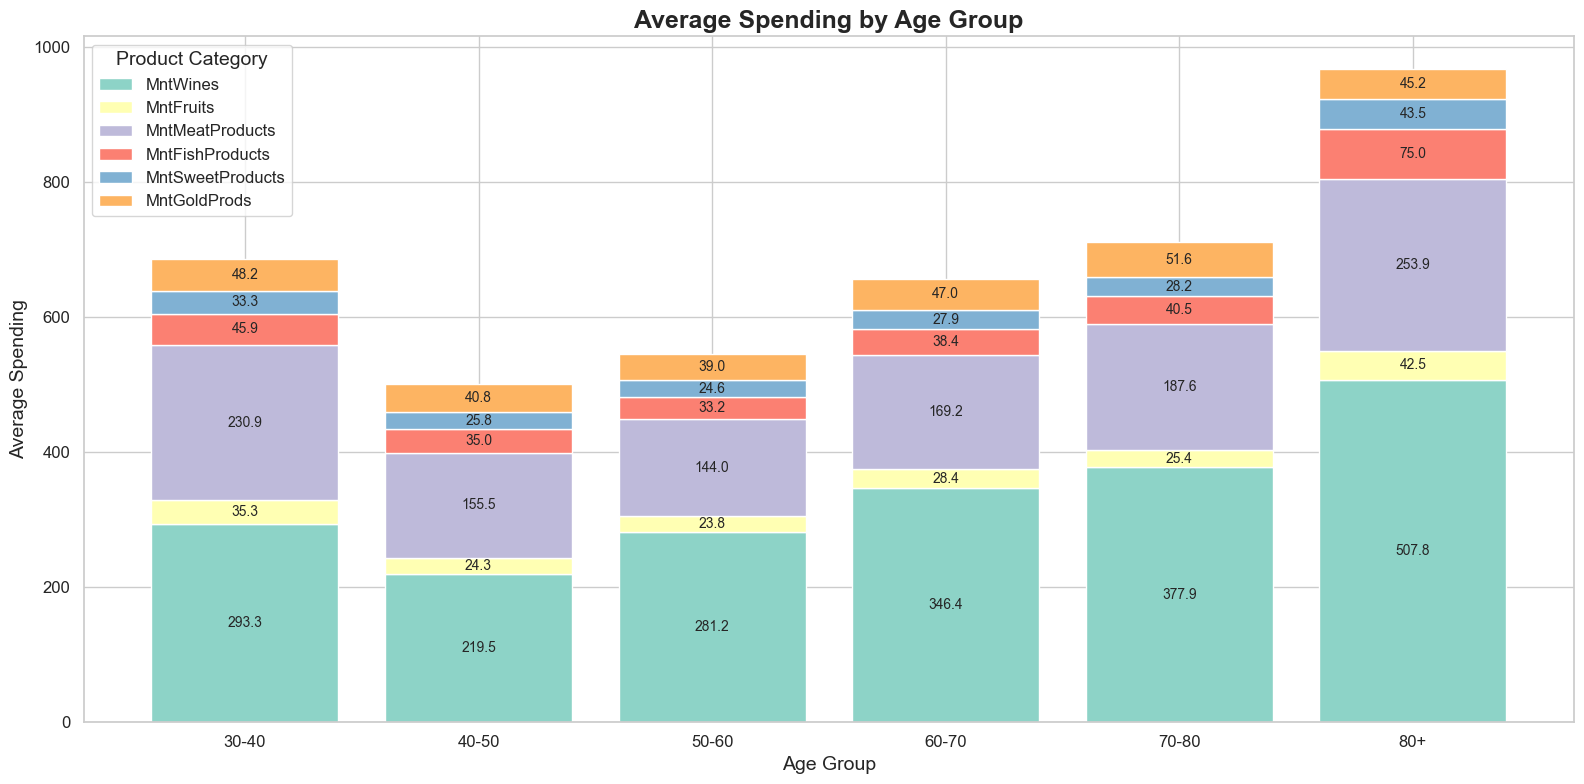

In [106]:
# spending by age group

palette = sns.color_palette("Set3")

# Create age groups
age_bins = [20, 30, 40, 50, 60, 70, 80, 100]
data['AgeGroup'] = pd.cut(
    data['Age'], 
    bins=age_bins, 
    labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'], 
    right=False
)

# Average spending by age group
spending_by_age = data.groupby('AgeGroup', observed=True)[products].mean()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(16, 8))

bottom = np.zeros(len(spending_by_age))
for i, product in enumerate(products):
    ax.bar(
        spending_by_age.index, 
        spending_by_age[product], 
        bottom=bottom, 
        color=palette[i], 
        label=product
    )
    bottom += spending_by_age[product].values  # update bottom for next product

# Add numbers on top of each segment
for i, age_group in enumerate(spending_by_age.index):
    cumulative = 0
    for j, product in enumerate(products):
        value = spending_by_age.loc[age_group, product]
        if value > 0:
            ax.text(
                i, 
                cumulative + value/2,  # middle of segment
                f"{value:.1f}", 
                ha='center', 
                va='center',
                fontsize=10
            )
        cumulative += value

ax.set_title('Average Spending by Age Group', fontsize=18, fontweight='bold')
ax.set_ylabel('Average Spending', fontsize=14)
ax.set_xlabel('Age Group', fontsize=14)
ax.legend(title='Product Category', fontsize=12, title_fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()